In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE # (Synthetic Minority Oversampling Technique)
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 Machine Learning Data Preprocessing Tutorial")
print("=" * 50)

🚀 Machine Learning Data Preprocessing Tutorial



📊 SECTION 1: IDENTIFYING AND HANDLING MISSING VALUES
-------------------------------------------------------
📋 Original Dataset:
    age   salary  experience department  performance_score
0  25.0  50000.0         2.0         IT                8.5
1  30.0  60000.0         5.0         HR                7.2
2   NaN  55000.0         3.0       None                9.1
3  35.0      NaN         NaN         IT                6.8
4  28.0  52000.0         1.0    Finance                8.0
5   NaN  58000.0         4.0         HR                7.5
6  45.0      NaN         8.0         IT                9.3
7  32.0  61000.0         6.0       None                8.2
8  29.0  49000.0         2.0    Finance                7.8
9  38.0  67000.0         9.0         IT                9.0

🔍 1.1 Identifying Missing Values:
Basic info about missing values:
Total missing values: 7

Missing values per column:
age                  2
salary               2
experience           1
department           2
performan

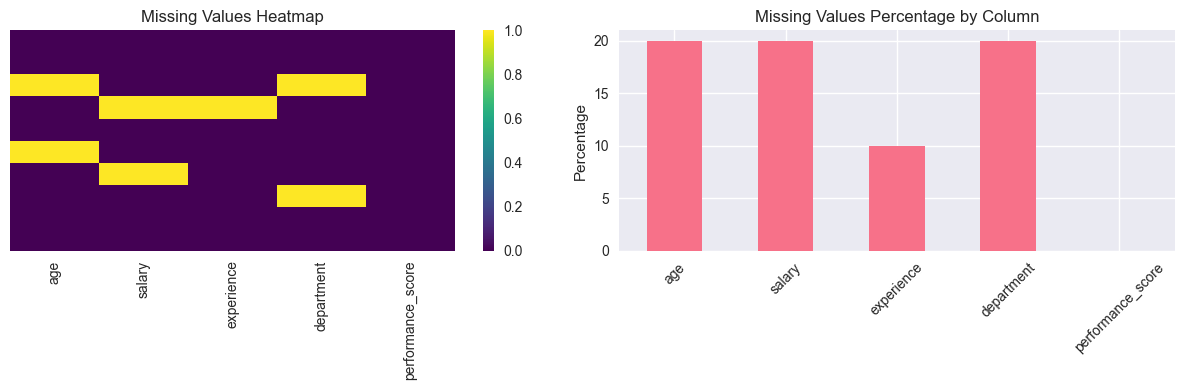


🛠️ 1.2 Different Ways to Handle Missing Values:
After dropping rows: 5 rows remaining (from 10)
Columns remaining after dropping: ['performance_score']
After threshold dropping: 8 rows remaining


In [4]:
# =============================================================================
# 1. IDENTIFYING AND HANDLING MISSING VALUES
# =============================================================================

print("\n📊 SECTION 1: IDENTIFYING AND HANDLING MISSING VALUES")
print("-" * 55)

# Create a sample dataset with missing values
np.random.seed(42)
data = {
    'age': [25, 30, np.nan, 35, 28, np.nan, 45, 32, 29, 38],
    'salary': [50000, 60000, 55000, np.nan, 52000, 58000, np.nan, 61000, 49000, 67000],
    'experience': [2, 5, 3, np.nan, 1, 4, 8, 6, 2, 9],
    'department': ['IT', 'HR', None, 'IT', 'Finance', 'HR', 'IT', None, 'Finance', 'IT'],
    'performance_score': [8.5, 7.2, 9.1, 6.8, 8.0, 7.5, 9.3, 8.2, 7.8, 9.0]
}

df = pd.DataFrame(data)
print("📋 Original Dataset:")
print(df)

print("\n🔍 1.1 Identifying Missing Values:")
print("Basic info about missing values:")
print(f"Total missing values: {df.isnull().sum().sum()}")
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nMissing values percentage:")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)

# Visual representation of missing values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')

plt.subplot(1, 2, 2)
missing_percent.plot(kind='bar')
plt.title('Missing Values Percentage by Column')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n🛠️ 1.2 Different Ways to Handle Missing Values:")

# Method 1: Drop rows with any missing values
df_dropped_rows = df.dropna()
print(f"After dropping rows: {len(df_dropped_rows)} rows remaining (from {len(df)})")

# Method 2: Drop columns with missing values
df_dropped_cols = df.dropna(axis=1)
print(f"Columns remaining after dropping: {list(df_dropped_cols.columns)}")

# Method 3: Drop based on threshold
df_threshold = df.dropna(thresh=4)  # Keep rows with at least 4 non-null values
print(f"After threshold dropping: {len(df_threshold)} rows remaining")


🔧 SECTION 2: IMPUTING MISSING VALUES
----------------------------------------
📈 2.1 Numerical Imputation Strategies:

Mean Imputation Results:
     age   salary  experience  performance_score
0  25.00  50000.0    2.000000                8.5
1  30.00  60000.0    5.000000                7.2
2  32.75  55000.0    3.000000                9.1
3  35.00  56500.0    4.444444                6.8
4  28.00  52000.0    1.000000                8.0

Median Imputation Results:
    age   salary  experience  performance_score
0  25.0  50000.0         2.0                8.5
1  30.0  60000.0         5.0                7.2
2  31.0  55000.0         3.0                9.1
3  35.0  56500.0         4.0                6.8
4  28.0  52000.0         1.0                8.0

Mode Imputation for Categorical:
department
IT         4
HR         2
Finance    2
Name: count, dtype: int64

🎯 2.2 KNN Imputation:
KNN Imputation Results:
    age   salary  experience  performance_score
0  25.0  50000.0    2.000000             

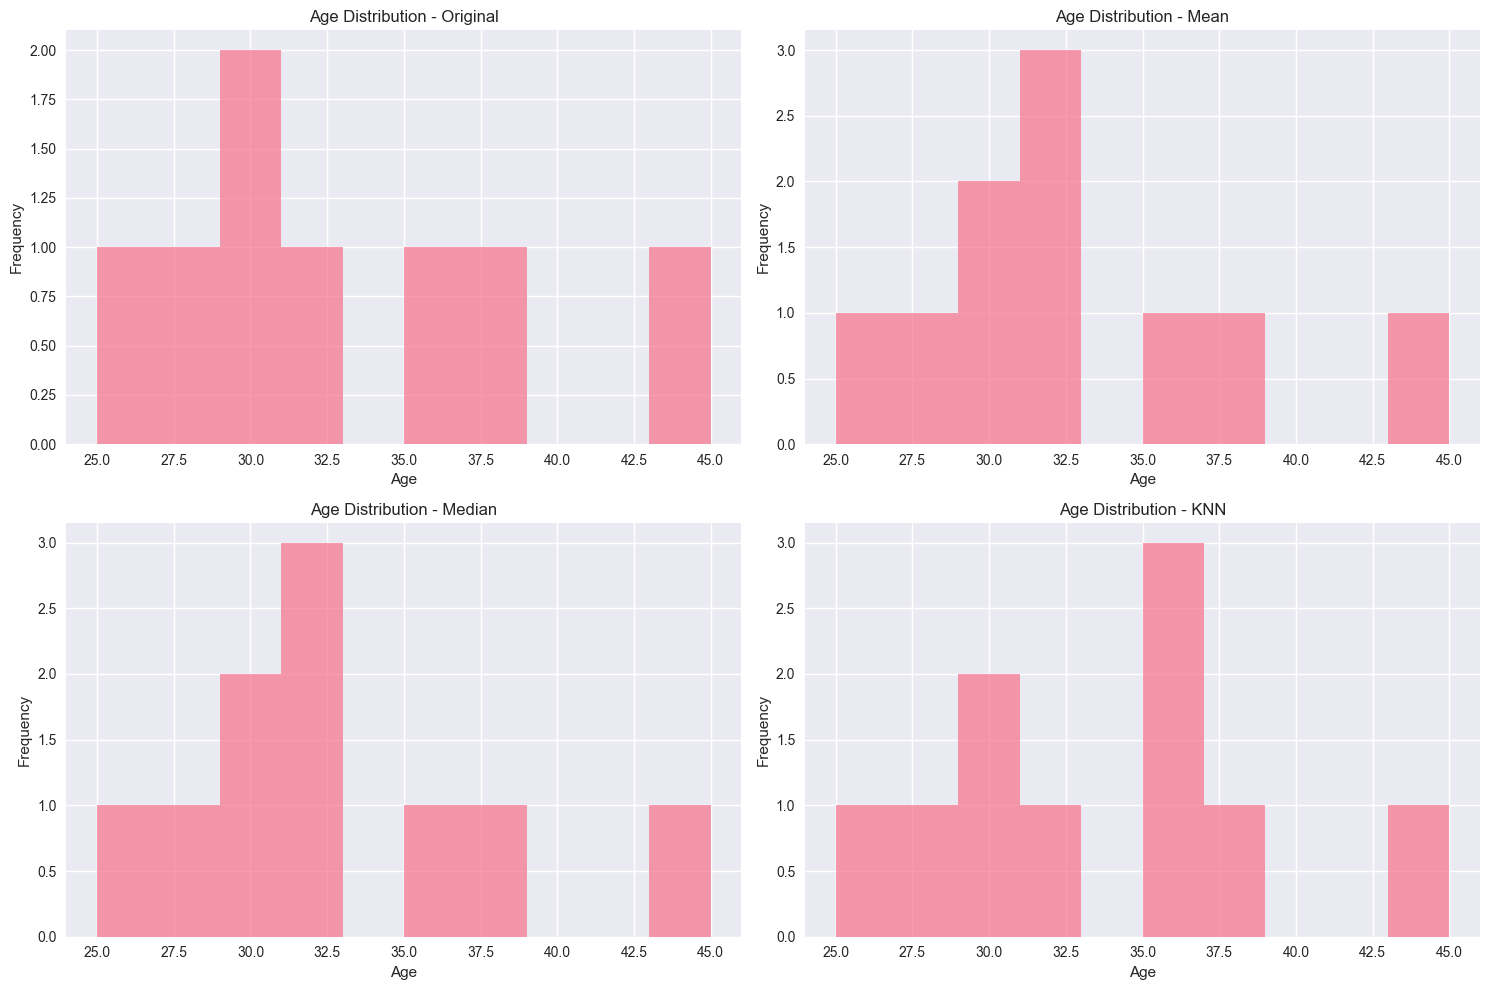

Mean & Median Imputation → Easy and fast, but can distort distributions and reduce variance.
• KNN Imputation → More computationally expensive, but keeps the distribution closer to the original data.
• Choice of method should depend on dataset size, presence of outliers, and how much preserving the distribution matters for your analysis or model.


In [7]:
# =============================================================================
# 2. IMPUTING MISSING VALUES WITH DIFFERENT STRATEGIES
# =============================================================================

print("\n🔧 SECTION 2: IMPUTING MISSING VALUES")
print("-" * 40)

# Separate numerical and categorical columns
numerical_cols = ['age', 'salary', 'experience', 'performance_score']
categorical_cols = ['department']

print("📈 2.1 Numerical Imputation Strategies:")

# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
df_mean = df.copy()
df_mean[numerical_cols] = mean_imputer.fit_transform(df[numerical_cols])
print("\nMean Imputation Results:")
print(df_mean[numerical_cols].head())

# Median Imputation
median_imputer = SimpleImputer(strategy='median')
df_median = df.copy()
df_median[numerical_cols] = median_imputer.fit_transform(df[numerical_cols])
print("\nMedian Imputation Results:")
print(df_median[numerical_cols].head())

# Mode Imputation for categorical
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode = df.copy()
df_mode[categorical_cols] = mode_imputer.fit_transform(df[categorical_cols])
print("\nMode Imputation for Categorical:")
print(df_mode['department'].value_counts())

# KNN Imputation
print("\n🎯 2.2 KNN Imputation:")
knn_imputer = KNNImputer(n_neighbors=3)
df_knn = df.copy()
# KNN imputation for numerical columns only
df_knn[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])
print("KNN Imputation Results:")
print(df_knn[numerical_cols].head())

# Forward Fill and Backward Fill
df_ffill = df.fillna(method='ffill')
df_bfill = df.fillna(method='bfill')

# Comparison of different imputation methods
plt.figure(figsize=(15, 10))
methods = ['Original', 'Mean', 'Median', 'KNN']
datasets = [df, df_mean, df_median, df_knn]

for i, (method, data) in enumerate(zip(methods, datasets)):
    plt.subplot(2, 2, i+1)
    data['age'].hist(bins=10, alpha=0.7)
    plt.title(f'Age Distribution - {method}')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
print(
    "Mean & Median Imputation → Easy and fast, but can distort distributions and reduce variance.\n"
    "• KNN Imputation → More computationally expensive, but keeps the distribution closer to the original data.\n"
    "• Choice of method should depend on dataset size, presence of outliers, and how much preserving the distribution matters for your analysis or model."
)

In [8]:
# =============================================================================
# 3. LIMITATIONS OF DIFFERENT IMPUTATION STRATEGIES
# =============================================================================

print("\n⚠️ SECTION 3: LIMITATIONS OF IMPUTATION STRATEGIES")
print("-" * 50)

# Create a more complex dataset to demonstrate limitations
np.random.seed(42)
n_samples = 1000

# Create correlated data
age = np.random.normal(35, 10, n_samples)
salary = 30000 + age * 1000 + np.random.normal(0, 5000, n_samples)
experience = np.maximum(0, age - 22 + np.random.normal(0, 2, n_samples))

# Introduce MCAR (Missing Completely At Random) missingness
mcar_mask = np.random.random(n_samples) < 0.1
age_mcar = age.copy()
age_mcar[mcar_mask] = np.nan

# Introduce MAR (Missing At Random) missingness - higher salary people less likely to report
mar_prob = 1 / (1 + np.exp((salary - 60000) / 10000))  # Sigmoid function
mar_mask = np.random.random(n_samples) < mar_prob * 0.2
salary_mar = salary.copy()
salary_mar[mar_mask] = np.nan

complex_df = pd.DataFrame({
    'age': age_mcar,
    'salary': salary_mar,
    'experience': experience
})

# Add some missing values to experience too
exp_missing = np.random.random(n_samples) < 0.05
complex_df.loc[exp_missing, 'experience'] = np.nan

print("🔍 3.1 Analyzing Imputation Method Performance:")

# Compare different imputation methods on correlated data
imputation_methods = {
    'Mean': SimpleImputer(strategy='mean'),
    'Median': SimpleImputer(strategy='median'),
    'KNN': KNNImputer(n_neighbors=5)
}

results = {}
original_corr = np.corrcoef(age, salary)[0, 1]
print(f"Original correlation between age and salary: {original_corr:.3f}")

for method_name, imputer in imputation_methods.items():
    imputed_data = imputer.fit_transform(complex_df[['age', 'salary']])
    imputed_corr = np.corrcoef(imputed_data[:, 0], imputed_data[:, 1])[0, 1]
    results[method_name] = imputed_corr
    print(f"{method_name} imputation correlation: {imputed_corr:.3f}")

print("\n📊 3.2 Key Limitations:")
limitations = {
    "Mean/Median Imputation": [
        "Reduces variance in the data",
        "Doesn't preserve relationships between variables",
        "Can introduce bias if data is not MCAR",
        "May create artificial peaks in distributions"
    ],
    "KNN Imputation": [
        "Computationally expensive for large datasets",
        "Sensitive to the choice of k",
        "May not work well with mixed data types",
        "Can be affected by the curse of dimensionality"
    ],
    "Forward/Backward Fill": [
        "Only suitable for time series data",
        "May introduce temporal bias",
        "Not appropriate for cross-sectional data"
    ]
}

for method, limits in limitations.items():
    print(f"\n{method}:")
    for limit in limits:
        print(f"  • {limit}")


⚠️ SECTION 3: LIMITATIONS OF IMPUTATION STRATEGIES
--------------------------------------------------
🔍 3.1 Analyzing Imputation Method Performance:
Original correlation between age and salary: 0.887
Mean imputation correlation: 0.819
Median imputation correlation: 0.819
KNN imputation correlation: 0.901

📊 3.2 Key Limitations:

Mean/Median Imputation:
  • Reduces variance in the data
  • Doesn't preserve relationships between variables
  • Can introduce bias if data is not MCAR
  • May create artificial peaks in distributions

KNN Imputation:
  • Computationally expensive for large datasets
  • Sensitive to the choice of k
  • May not work well with mixed data types
  • Can be affected by the curse of dimensionality

Forward/Backward Fill:
  • Only suitable for time series data
  • May introduce temporal bias
  • Not appropriate for cross-sectional data



⚖️ SECTION 4: HANDLING IMBALANCED DATASETS
---------------------------------------------
📊 4.1 Original Dataset Distribution:
Class distribution:
target
0    896
1    104
Name: count, dtype: int64
Class distribution (%):
target
0    89.6
1    10.4
Name: proportion, dtype: float64

🔧 4.2 Techniques to Handle Imbalance:

After Random Undersampling:
Original training size: 800
Undersampled size: 166
Class distribution: [83 83]

After SMOTE:
Original training size: 800
SMOTE size: 1434
Class distribution: [717 717]

Using Class Weights in Model:


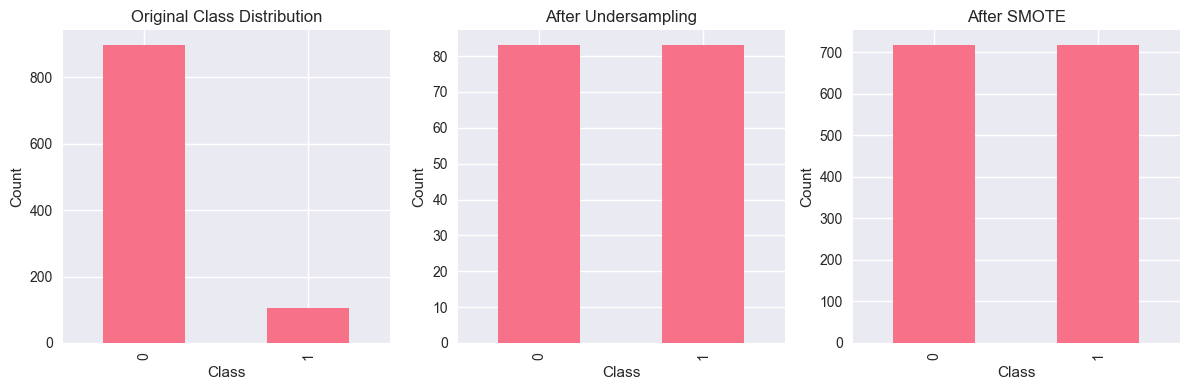


📈 4.3 Performance Comparison:

Original Results:
              precision    recall  f1-score   support

    Majority       0.97      1.00      0.99       179
    Minority       1.00      0.76      0.86        21

    accuracy                           0.97       200
   macro avg       0.99      0.88      0.93       200
weighted avg       0.98      0.97      0.97       200


Undersampled Results:
              precision    recall  f1-score   support

    Majority       0.99      0.98      0.99       179
    Minority       0.87      0.95      0.91        21

    accuracy                           0.98       200
   macro avg       0.93      0.97      0.95       200
weighted avg       0.98      0.98      0.98       200


SMOTE Results:
              precision    recall  f1-score   support

    Majority       0.99      0.99      0.99       179
    Minority       0.95      0.90      0.93        21

    accuracy                           0.98       200
   macro avg       0.97      0.95      

In [9]:
# =============================================================================
# 4. HANDLING IMBALANCED DATASETS
# =============================================================================

print("\n⚖️ SECTION 4: HANDLING IMBALANCED DATASETS")
print("-" * 45)

# Create an imbalanced dataset
X_imb, y_imb = make_classification(n_samples=1000, n_features=20, n_informative=10,
                                   n_redundant=5, n_clusters_per_class=1,
                                   weights=[0.9, 0.1], random_state=42)

# Convert to DataFrame for easier handling
feature_names = [f'feature_{i}' for i in range(X_imb.shape[1])]
df_imbalanced = pd.DataFrame(X_imb, columns=feature_names)
df_imbalanced['target'] = y_imb

print("📊 4.1 Original Dataset Distribution:")
print(f"Class distribution:")
print(df_imbalanced['target'].value_counts())
print(f"Class distribution (%):")
print(df_imbalanced['target'].value_counts(normalize=True) * 100)

# Visualize class distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
df_imbalanced['target'].value_counts().plot(kind='bar')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

print("\n🔧 4.2 Techniques to Handle Imbalance:")

# Method 1: Random Undersampling
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, test_size=0.2, random_state=42)

undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

print(f"\nAfter Random Undersampling:")
print(f"Original training size: {len(y_train)}")
print(f"Undersampled size: {len(y_under)}")
print(f"Class distribution: {np.bincount(y_under)}")

# Method 2: SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print(f"\nAfter SMOTE:")
print(f"Original training size: {len(y_train)}")
print(f"SMOTE size: {len(y_smote)}")
print(f"Class distribution: {np.bincount(y_smote)}")

# Method 3: Class Weight Balancing
print(f"\nUsing Class Weights in Model:")

# Train models with different approaches
models = {
    'Original': RandomForestClassifier(random_state=42),
    'Undersampled': RandomForestClassifier(random_state=42),
    'SMOTE': RandomForestClassifier(random_state=42),
    'Class Weight': RandomForestClassifier(class_weight='balanced', random_state=42)
}

datasets = {
    'Original': (X_train, y_train),
    'Undersampled': (X_under, y_under),
    'SMOTE': (X_smote, y_smote),
    'Class Weight': (X_train, y_train)
}

# Plot class distributions
plt.subplot(1, 3, 2)
pd.Series(y_under).value_counts().plot(kind='bar')
plt.title('After Undersampling')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
pd.Series(y_smote).value_counts().plot(kind='bar')
plt.title('After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Evaluate all methods
print("\n📈 4.3 Performance Comparison:")
for name, model in models.items():
    X_tr, y_tr = datasets[name]
    model.fit(X_tr, y_tr)
    predictions = model.predict(X_test)
    
    print(f"\n{name} Results:")
    print(classification_report(y_test, predictions, target_names=['Majority', 'Minority']))

In [12]:
print("Recall for minority is 0.76 which says that Model misses many minority cases (due to imbalance) in the original dataset")

Recall for minority is 0.76 which says that Model misses many minority cases (due to imbalance) in the original dataset
